In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [14]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
species_names = df['Species'].unique()
species_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [21]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Id', 'Species'])
Y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
#Converting 1D list to 2d array
Y_train = keras.utils.to_categorical(Y_train, num_classes=3)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [27]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5)) #To avoid overfitting 50% of data is dropped out
model.add(Dense(units=3, activation='softmax'))

In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,Y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 2s - loss: 1.1309 - accuracy: 0.3333 - 2s/epoch - 484ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0906 - accuracy: 0.3619 - 27ms/epoch - 7ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0450 - accuracy: 0.4286 - 19ms/epoch - 5ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9487 - accuracy: 0.6286 - 19ms/epoch - 5ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9217 - accuracy: 0.5714 - 15ms/epoch - 4ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8624 - accuracy: 0.5810 - 17ms/epoch - 4ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8557 - accuracy: 0.6381 - 25ms/epoch - 6ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8211 - accuracy: 0.7429 - 6ms/epoch - 1ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7918 - accuracy: 0.6857 - 15ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7722 - accuracy: 0.7238 - 16ms/epoch - 4ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7534 - accuracy: 0.7619 - 19ms/epoch - 5ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7490 - accuracy: 0.7238 - 21ms/epoch - 5ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6950 - accuracy: 0

In [33]:
predictions = model.predict(X_test)
print(predictions[:5])

2/2 [==============================] - 0s 0s/step
[[2.6235051e-02 5.5277777e-01 4.2098719e-01]
 [1.5452116e-04 9.5731802e-02 9.0411365e-01]
 [9.9937755e-01 6.1304646e-04 9.3816634e-06]
 [9.9995267e-01 4.6718589e-05 6.3295357e-07]
 [9.9956602e-01 4.2593799e-04 7.9616866e-06]]


In [34]:
predictions = np.argmax(predictions, axis=-1)
print(predictions[:5])

[1 2 0 0 0]


In [35]:
print(Y_test[:5])

85     1
125    2
49     0
33     0
17     0
Name: Species, dtype: int32


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(Y_test,predictions))

1.0


In [37]:
cm = confusion_matrix(Y_test, predictions)
print(cm)

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


Text(50.72222222222221, 0.5, 'Actual')

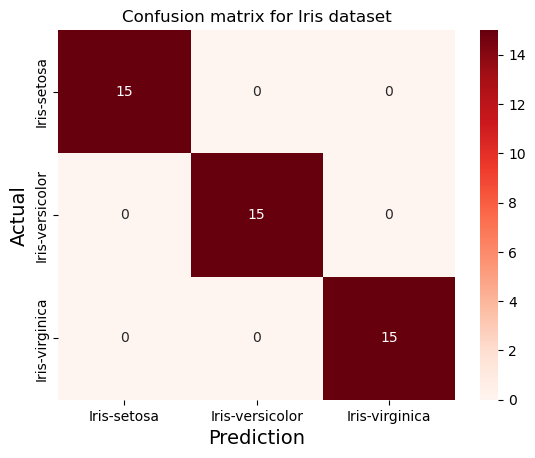

In [41]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_names, yticklabels=species_names)
ax.set_title("Confusion matrix for Iris dataset")
ax.set_xlabel("Prediction", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)